<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/1_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
- This is the introduction to Tensorflow 2 and Keras

# Dataset
- Fashion MNIST
- https://github.com/zalandoresearch/fashion-mnist

# Contents

- Implement a Perceptron, Simple NN/ANN (Neural Network or Artificial Neural Network) for a multiclass classification task

# What you'll learn
- ANN or Simply called NN
- Perceptron
- MLP (Multi Layer Perceptron)
- FFNN (Feed Forward Neural Network)
- DNN

# Imports

In [1]:
# !pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 3.9MB 47.7MB/s 
     |████████████████████████████████| 450kB 50.8MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.1.0'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

from keras.activations import relu, softmax

from keras.initializers import RandomUniform

from keras.optimizers import adam

from keras.losses import sparse_categorical_crossentropy

from keras.metrics import sparse_categorical_accuracy

In [0]:
from sklearn.metrics import accuracy_score

# Load the Data

In [0]:
mnist = keras.datasets.fashion_mnist

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [41]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [42]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Exploration

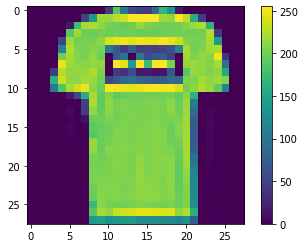

In [37]:
plt.figure()
plt.imshow(X_train_full[1])
plt.colorbar()

In [43]:
class_names[y_train_full[1]]

'T-shirt/top'

In [13]:
np.max(X_train_full[0])

255

In [0]:
X_train, X_valid = X_train_full[:50000]/255, X_train_full[50000:]/255

In [0]:
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [0]:
X_test = X_test/255

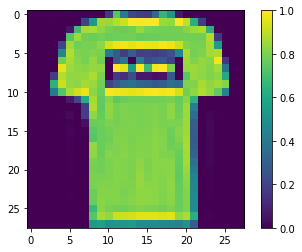

In [45]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# Build the Model

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
# Other way to build the Model
model1 = Sequential([Flatten(input_shape=(28, 28)),
                     Dense(units=128, activation=relu),
                     Dense(units=10, activation=softmax)
                     ])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

In [0]:
hidden1 = model.layers[1]

In [23]:
hidden1.name

'dense'

In [0]:
weights, biases = hidden1.get_weights()
# Similarly we have set_weights() function

In [25]:
weights.shape

(784, 128)

In [26]:
weights

array([[-0.06313407, -0.0350948 , -0.00647154, ..., -0.00926299,
        -0.02336068,  0.07686783],
       [ 0.01804565, -0.06394459, -0.05529499, ..., -0.07311568,
        -0.05778806, -0.01714128],
       [-0.02707488,  0.0762024 ,  0.04794604, ..., -0.05523635,
        -0.04689068,  0.06265097],
       ...,
       [ 0.07392671,  0.01901073, -0.00942187, ..., -0.07730391,
        -0.0406833 , -0.04912748],
       [ 0.01216201, -0.06260191, -0.01227657, ..., -0.03658998,
        -0.07813816,  0.04320783],
       [ 0.05668514, -0.05110592,  0.04416094, ..., -0.05696282,
         0.02816308, -0.02382248]], dtype=float32)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Kernal_initializer and bias_initializer

# Compile the Model
- Optimizer
- Loss Function
- Metrics

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# model1.compile(optimizer=adam, loss=sparse_categorical_crossentropy, metrics=[sparse_categorical_accuracy])

# Train the Model

In [57]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 90us/sample - loss: 0.1935 - accuracy: 0.9283 - val_loss: 0.2887 - val_accuracy: 0.8932
Epoch 2/10
50000/50000 [==============================] - 5s 92us/sample - loss: 0.1875 - accuracy: 0.9288 - val_loss: 0.2794 - val_accuracy: 0.8973
Epoch 3/10
50000/50000 [==============================] - 5s 91us/sample - loss: 0.1826 - accuracy: 0.9320 - val_loss: 0.3005 - val_accuracy: 0.8919
Epoch 4/10
50000/50000 [==============================] - 5s 91us/sample - loss: 0.1813 - accuracy: 0.9314 - val_loss: 0.2886 - val_accuracy: 0.8973
Epoch 5/10
50000/50000 [==============================] - 4s 86us/sample - loss: 0.1733 - accuracy: 0.9341 - val_loss: 0.2942 - val_accuracy: 0.9000
Epoch 6/10
50000/50000 [==============================] - 4s 86us/sample - loss: 0.1698 - accuracy: 0.9353 - val_loss: 0.3020 - val_accuracy: 0.8983
Epoch 7/10
50000/50000 [==============================] 

In [0]:
# Other useful arguments of fit() method
# validation_split
# class weights
# Sample weights

In [58]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 50000,
 'steps': 1563,
 'verbose': 0}

In [59]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

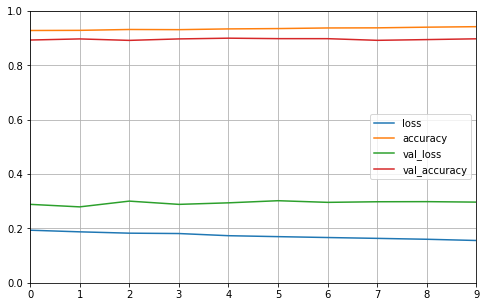

In [62]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

# Predict

In [0]:
y_pred = model.predict_classes(X_test)

In [32]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

# Evaluate

In [33]:
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.8807


In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.3361 - accuracy: 0.8807
